### Libraries

In [85]:
import importlib
import os
import sys

sys.path.insert(0, '../src')
import dataset

importlib.reload(dataset)
from dataset import RORDDataset

In [86]:
# move all the files to base folder

# img_dir = '/media/tiagociiic/easystore/RORD/train/img'
# gt_dir = '/media/tiagociiic/easystore/RORD/train/gt'
# mask_dir = '/media/tiagociiic/easystore/RORD/train/mask'
# 
# for root, dirs, files in os.walk(img_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), img_dir)
# 
# for root, dirs, files in os.walk(gt_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), gt_dir)
# 
# for root, dirs, files in os.walk(mask_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), mask_dir)

### RORDDataset Class

In [87]:
# Create a sample dataset
external_disk_path = "/media/tiagociiic/easystore"
split = 'train'
dataset_dir = os.path.join(external_disk_path, "RORD")
train_dir = os.path.join(dataset_dir, split)

In [101]:
image_size = 512

# Create an instance of the RORDDataset class
dataset = RORDDataset(dataset_dir, split, image_size)

# Test the __len__ method
print(f"Dataset length: {len(dataset)}")


Loading image, ground truth, and mask files...
Found 162204 image files
Found 412745 ground truth files
Found 161164 mask files
Loading image file 1/162204: I-211003_I09025_T03_F0089.jpg
Loading image file 101/162204: I-211223_O07032_T11_F0003.jpg
Loading image file 201/162204: I-211230_I01002_T09_F0010.jpg
Loading image file 301/162204: I-210724_I09026_T02_F0012.jpg
Loading image file 401/162204: I-211203_O02011_T16_F0013.jpg
Loading image file 501/162204: I-211016_I09027_T05_F0142.jpg
Loading image file 601/162204: I-211208_I07021_T06_F0007.jpg
Loading image file 701/162204: I-211221_O01008_T04_F0002.jpg
Loading image file 801/162204: I-211016_I09027_T05_F0048.jpg
Loading image file 901/162204: I-211016_I09027_T05_F0126.jpg
Loading image file 1001/162204: I-210618_I01006_T02_F0076.jpg
Loading image file 1101/162204: I-210730_O04020_W05_F0159.jpg
Loading image file 1201/162204: I-210627_O04018_T08_F0167.jpg
Loading image file 1301/162204: I-210627_O04018_T09_F0019.jpg
Loading image fi

Image 1 range: [0, 255], GT 1 range: [0, 255], Mask 1 range: [0.0, 255.0]
Image 2 range: [1, 243], GT 2 range: [31, 243], Mask 2 range: [0.0, 255.0]
Image 3 range: [0, 255], GT 3 range: [0, 253], Mask 3 range: [0.0, 255.0]
Image 4 range: [0, 248], GT 4 range: [0, 248], Mask 4 range: [0.0, 255.0]


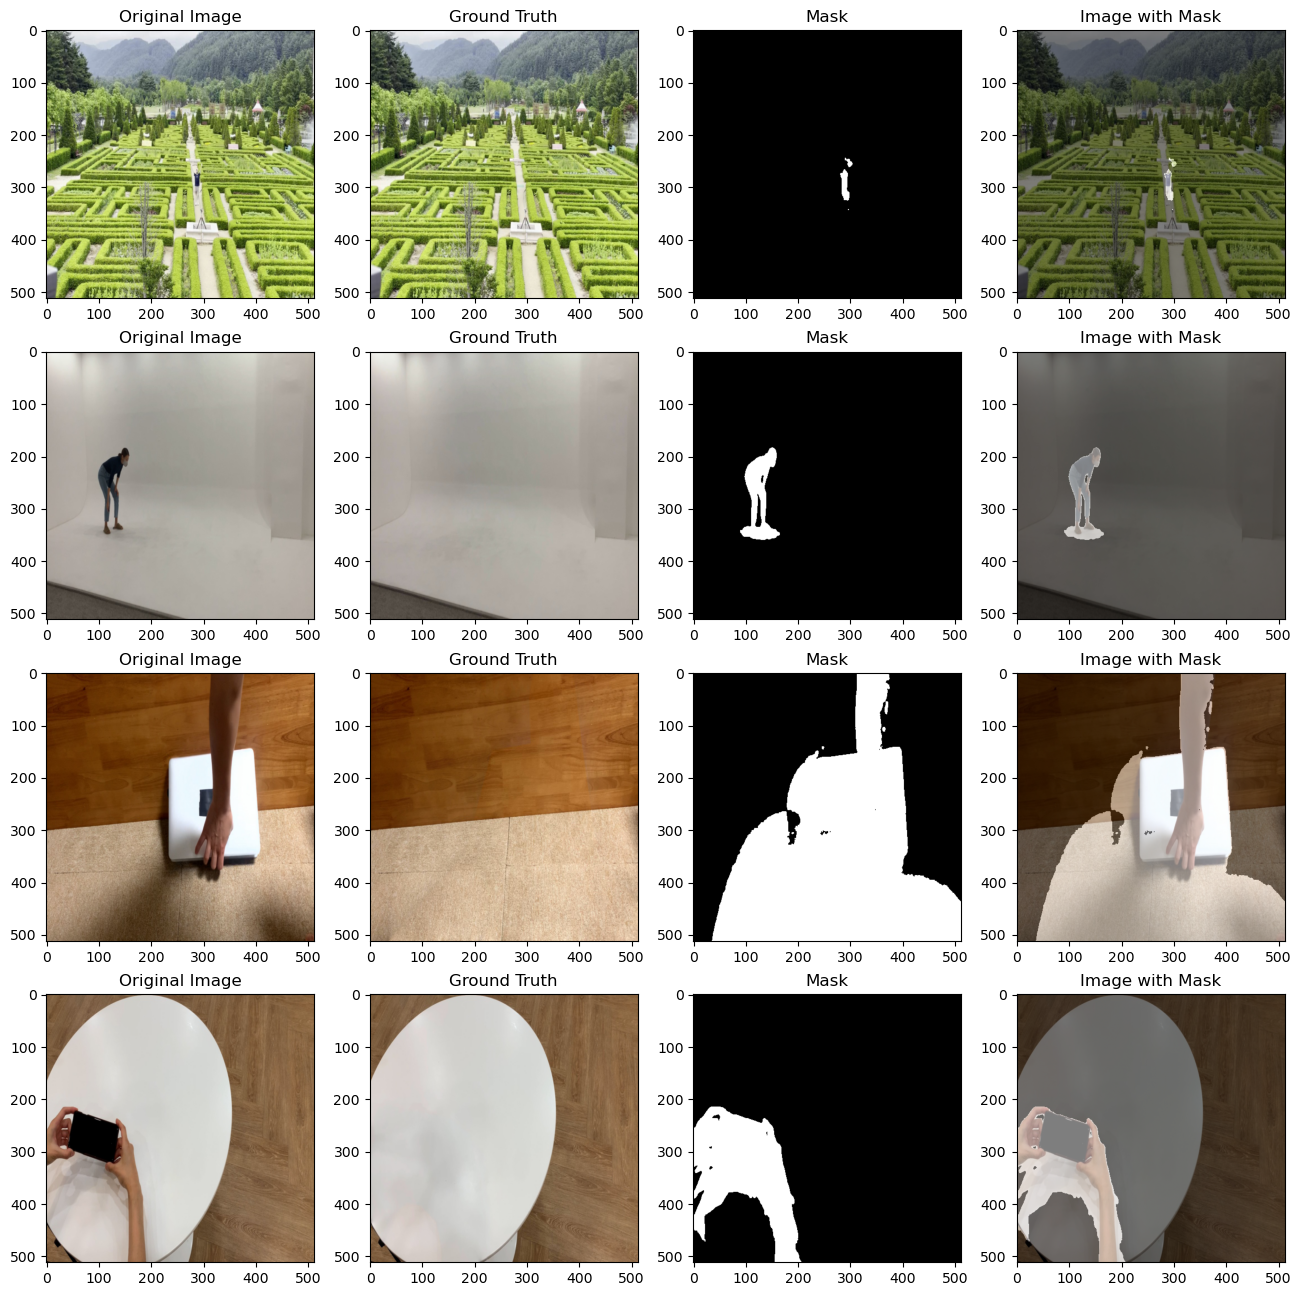

In [109]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Select 4 random indices
indices = random.sample(range(len(dataset)), 4)

plt.figure(figsize=(16, 16))
for i, index in enumerate(indices):
    sample = dataset[index]

    image = np.array(sample['image'])
    gt = np.array(sample['gt'])
    mask = np.array(sample['mask'])

    print(
        f"Image {i + 1} range: [{image.min()}, {image.max()}], GT {i + 1} range: [{gt.min()}, {gt.max()}], Mask {i + 1} range: [{mask.min()}, {mask.max()}]")

    plt.subplot(4, 4, i * 4 + 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(4, 4, i * 4 + 2)
    plt.imshow(gt)
    plt.title("Ground Truth")

    plt.subplot(4, 4, i * 4 + 3)
    plt.imshow(mask / 255.0)
    plt.title("Mask")

    plt.subplot(4, 4, i * 4 + 4)
    plt.imshow(image / 255.0)
    plt.imshow(mask / 255.0, alpha=0.5)
    plt.title("Image with Mask")

plt.show()

In [ ]:
# TODO: improve masking algorithm
# TODO: train model in the 161164 images